In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
sns.set_palette(palette='deep')
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100

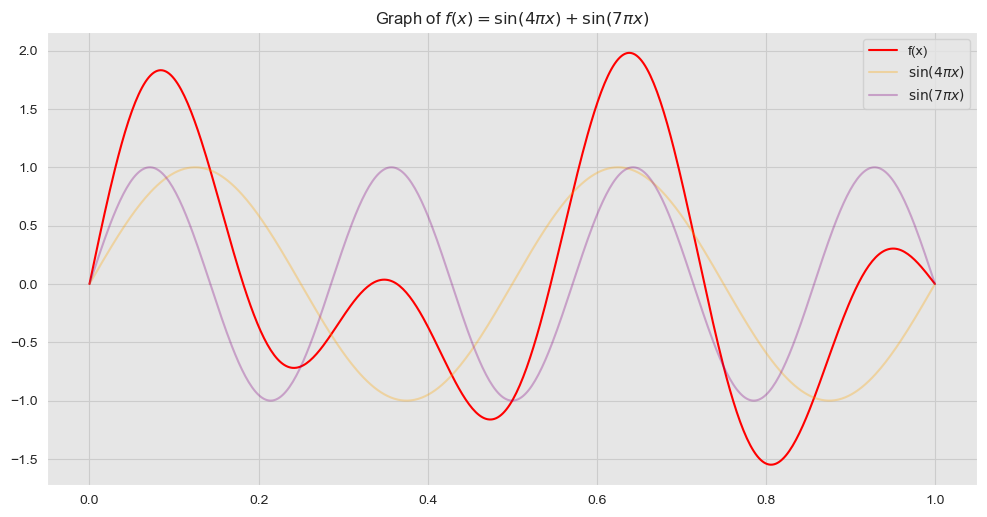

In [2]:
# Define dimension.
d = 1
# Number of samples (training set). 
n = 500

x = np.linspace(start=0, stop=1, num=n)

def f(x):
    f = np.sin((4*np.pi)*x) + np.sin((7*np.pi)*x)
    return(f)

f_x = f(x)

fig, ax = plt.subplots()
# Plot function f. 
sns.lineplot(x=x, y=f_x, color='red', label = 'f(x)', ax=ax)
# Plot function components.
sns.lineplot(x=x, y=np.sin((4*np.pi)*x), color='orange', label='$\sin(4 \pi x)$', alpha=0.3, ax=ax)
sns.lineplot(x=x, y=np.sin((7*np.pi)*x), color='purple', label='$\sin(7 \pi x)$', alpha=0.3, ax=ax)
ax.legend(loc='upper right')
ax.set_title(r'Graph of $f(x) = \sin(4\pi x) + \sin(7\pi x)$');

In [3]:
# Error standard deviation. 
sigma_n = 0.4
# Errors.
epsilon = np.random.normal(loc=0, scale=sigma_n, size=n)
# Observed target variable. 
y = f_x + epsilon

/Users/carlogattuso/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


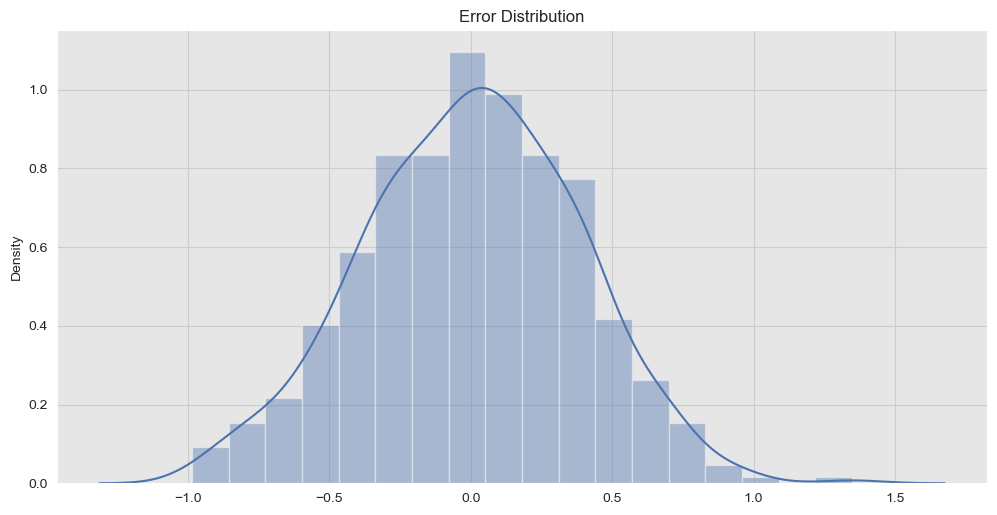

In [4]:
fig, ax = plt.subplots()
# Plot errors. 
sns.distplot(epsilon, ax=ax)
ax.set(title='Error Distribution');

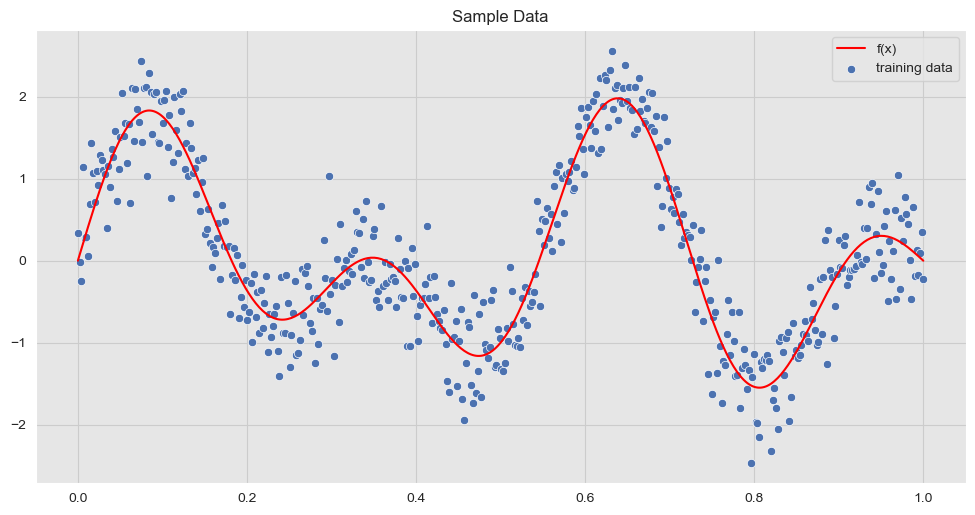

In [5]:
fig, ax = plt.subplots()
# Plot training data.
sns.scatterplot(x=x, y=y, label='training data', ax=ax);
# Plot "true" linear fit.
sns.lineplot(x=x, y=f_x, color='red', label='f(x)', ax=ax);

ax.set(title='Sample Data')
ax.legend(loc='upper right');

In [6]:
n_star = 100

x_star = np.linspace(start=0, stop=1, num=n_star)

In [7]:
def kernel_function(x, y, sigma_f=1, l=1):
    """Define squared exponential kernel function."""
    kernel = sigma_f * np.exp(- (np.linalg.norm(x - y)**2) / (2 * l**2))
    return kernel

In [8]:
l = 0.1
sigma_f = 2

In [9]:
import itertools

def compute_cov_matrices(x, x_star, sigma_f=1, l=1):
    """
    Compute components of the covariance matrix of the joint distribution.
    
    We follow the notation:
    
        - K = K(X, X) 
        - K_star = K(X_*, X)
        - K_star2 = K(X_*, X_*)
    """
    n = x.shape[0]
    n_star = x_star.shape[0]

    K = [kernel_function(i, j, sigma_f=sigma_f, l=l) for (i, j) in itertools.product(x, x)]

    K = np.array(K).reshape(n, n)
    
    K_star2 = [kernel_function(i, j, sigma_f=sigma_f, l=l) for (i, j) in itertools.product(x_star, x_star)]

    K_star2 = np.array(K_star2).reshape(n_star, n_star)
    
    K_star = [kernel_function(i, j, sigma_f=sigma_f, l=l) for (i, j) in itertools.product(x_star, x)]

    K_star = np.array(K_star).reshape(n_star, n)
    
    return (K, K_star2, K_star)

In [10]:
K, K_star2, K_star = compute_cov_matrices(x, x_star, sigma_f=sigma_f, l=l)